# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Business Understanding

European banks need to strengthen their financial assets. One approach is to offer long-term deposits with low interest rates through direct marketing campaigns. At the same time, they also need to reduce their costs and turnaround time. The problem is, the public has experienced some fatigue from all these campaigns, and they are not as effective as they could be. Can we learn from the data to find out what customer attributes increase the chance of a successful depost? If so, the campaigns can be tailored to these high-probability prospects, avoiding wasted time and resources on those that are less likely to deposit.

Reference - https://github.com/jbeno/bank 

## Business Objectives and Success Criteria

- Describe Characteristics of Depositers – Identify the characteristics of prospects that end up depositing money, vs. those that don't. This will allow the banks to target the customers that are most likely to deposit.
- Create Predictive Model – Create a machine learning model that will classify prospects as either likely to deposit or not, based on their characteristics.
- Compare Performance of Classifiers – Compare the performance of the following classifiers: K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines

## Data Mining Goals and Success Criteria

The following data analysis approach will be taken to meet the business goals identified above:

- Data Cleaning: The data set will be examined and cleansed to prepare it for analysis. Missing values and outliers will be handled.
- Data Transformation/Encoding: To maximize the use of the data we have, categorical/nominal values will be encoded into a suitable numeric form. If any variables exhibit a skewed distribution, log transformation may be considered to bring them closer to normal distribution.
- Feature Engineering: In addition, there may be opportunities to engineer new features that are derived from the variables present in the dataset.
- Exploratory Data Analysis: The dataset will be explored using descriptive statistics, correlations, and by plotting charts of variable distributions and multivariate relationships.
- Model Iteration: Data will be split into training and test sets. Pipelines will be constructed to process data, select features, and train classification models. A variety of hyper-parameters will be explored to find the optimum model during cross-validation.
- Model Evaluation: Model performance will be evaluated against the test dataset. The best performing model will be selected based on it's ability to predict the test data, ensuring it was not overfitted to the training data set and can be generalized to new data.

# Data Understanding 

## Data Attributes 

### Bank client Attributes 
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### Customer contact attribute for the last contact for the current campaign 
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Others 
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

## Missing Attribute Values
There are several missing values in some categorical attributes, all coded with the "unknown" label.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import re

In [104]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [105]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [107]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [108]:
# check for value counts 
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [109]:
# rename the columns 

df = df.rename(columns={"previous": "previous_contact"})
df = df.rename(columns={"emp.var.rate": "employment_variation_rate"})
df = df.rename(columns={"cons.price.idx": "cons_price_idx"})
df = df.rename(columns={"cons.conf.idx": "consumer_confidence_index"})
df = df.rename(columns={"nr.employed": "number_of_employees"})
df = df.rename(columns={"y": "client_subscribed_term_deposit"})

## Investigate Missing or Problematic Data

In [110]:
# null values 
df.isna().sum()

age                               0
job                               0
marital                           0
education                         0
default                           0
housing                           0
loan                              0
contact                           0
month                             0
day_of_week                       0
duration                          0
campaign                          0
pdays                             0
previous_contact                  0
poutcome                          0
employment_variation_rate         0
cons_price_idx                    0
consumer_confidence_index         0
euribor3m                         0
number_of_employees               0
client_subscribed_term_deposit    0
dtype: int64

In [111]:
df.job.value_counts()

#In this example unknown is equivalent to NaN since the information is missing 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

## Simple visualisation of the data to understand how a single feature affects the outcome

Text(0.5, 1.0, 'Histogram of Age and client subscription to term deposit')

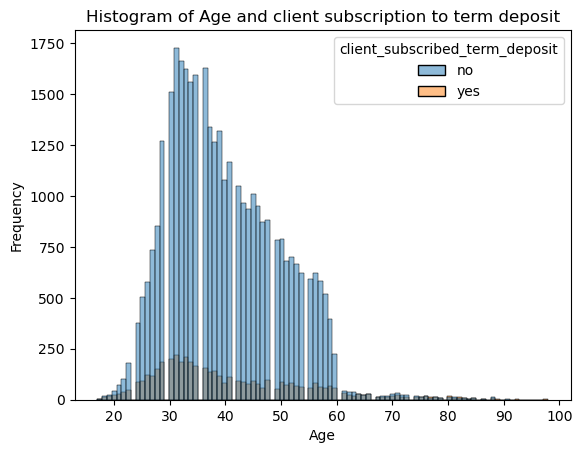

In [112]:
# using seaborn 
sns.histplot(data=df, x="age", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of Job and client subscription to term deposit')

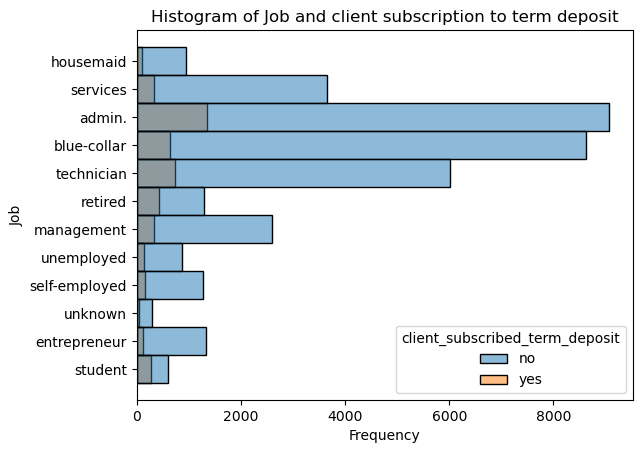

In [113]:
# using seaborn 
sns.histplot(data=df, y="job", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.title('Histogram of Job and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of marital status and client subscription to term deposit')

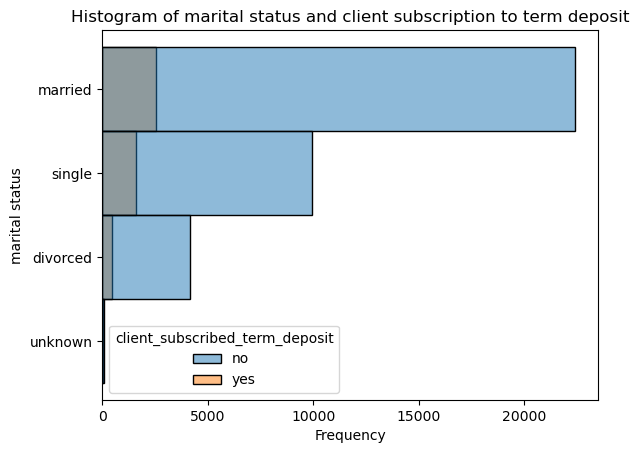

In [114]:
# using seaborn 
sns.histplot(data=df, y="marital", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('marital status')
plt.title('Histogram of marital status and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of Education and client subscription to term deposit')

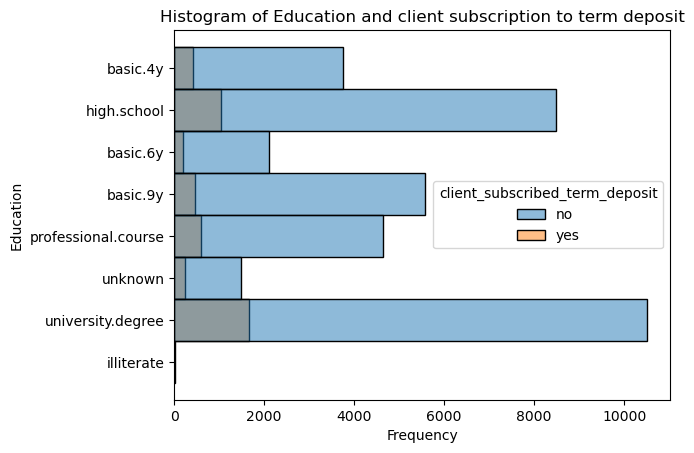

In [115]:
# using seaborn 
sns.histplot(data=df, y="education", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('Education')
plt.title('Histogram of Education and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of "has credit in default" and client subscription to term deposit')

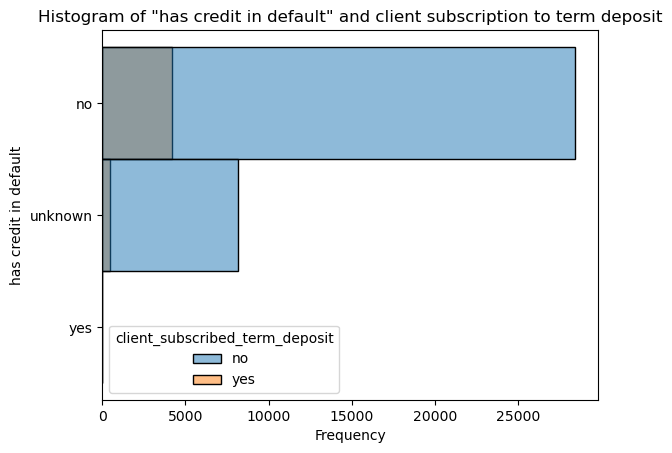

In [116]:
# using seaborn 
sns.histplot(data=df, y="default", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('has credit in default')
plt.title('Histogram of "has credit in default" and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of "has housing loan" and client subscription to term deposit')

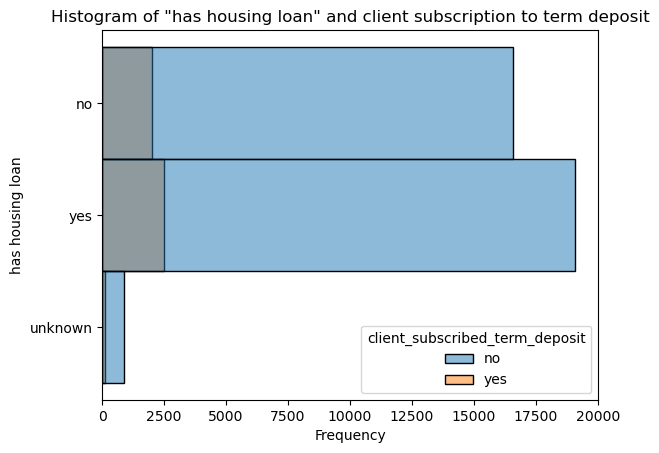

In [117]:
# using seaborn 
sns.histplot(data=df, y="housing", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('has housing loan')
plt.title('Histogram of "has housing loan" and client subscription to term deposit')

Text(0.5, 1.0, 'Histogram of "has personal loan" and client subscription to term deposit')

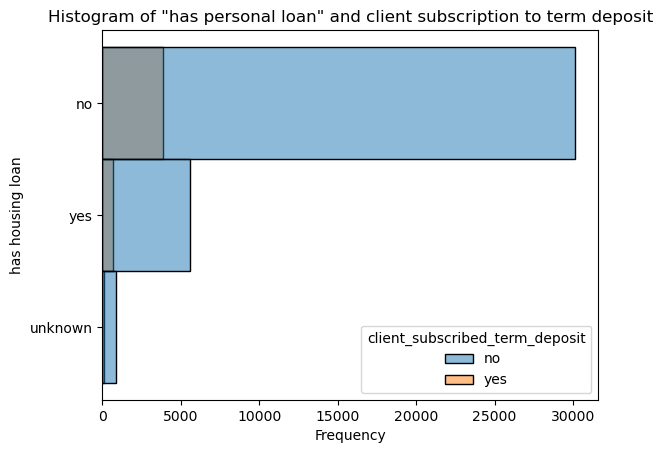

In [118]:
# using seaborn 
sns.histplot(data=df, y="loan", hue="client_subscribed_term_deposit")

# Add labels and title to the plot
plt.xlabel('Frequency')
plt.ylabel('has housing loan')
plt.title('Histogram of "has personal loan" and client subscription to term deposit')

In [119]:
# Count the number of 'unknown' values in each object column
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    unknown_count = (df[col] == 'unknown').sum()
    unknown_percent = unknown_count / len(df) * 100
    print(f"{col}: {unknown_count} ({unknown_percent:.2f}%)")

job: 330 (0.80%)
marital: 80 (0.19%)
education: 1731 (4.20%)
default: 8597 (20.87%)
housing: 990 (2.40%)
loan: 990 (2.40%)
contact: 0 (0.00%)
month: 0 (0.00%)
day_of_week: 0 (0.00%)
poutcome: 0 (0.00%)
client_subscribed_term_deposit: 0 (0.00%)


## Conclusion 
- Mostly middle age is when clients are drawn towards making deposits 
- Admins, blue-collar and technicians have the highest deposits 
- Married people tend to make more deposits 
- Individuals with university degree tend to make more deposits 
- Housing loan doesn't seem to affect the outcome while default and personal loans does 

### Is there Bias in the Data 
- Some or the larger population size tends to have more positive outcomes, example 
    - university degree and high school degree has a higher positive outcome and their population size is the two largest in the dataset 
    - In marital status the number of married is more then single which could have led to more positive outcomes in the married population 

In [120]:
# bias analysis for marital staus 
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [121]:
df.groupby(by=["marital", "client_subscribed_term_deposit"]).size()

marital   client_subscribed_term_deposit
divorced  no                                 4136
          yes                                 476
married   no                                22396
          yes                                2532
single    no                                 9948
          yes                                1620
unknown   no                                   68
          yes                                  12
dtype: int64

## Bias In Data 

- 10% of married people who were contacted accepted 
- 14% of single people who were contacted accepted 

In conclusion the reason it looks like Married people are more likely to make the deposit is due to large population that was contacted 

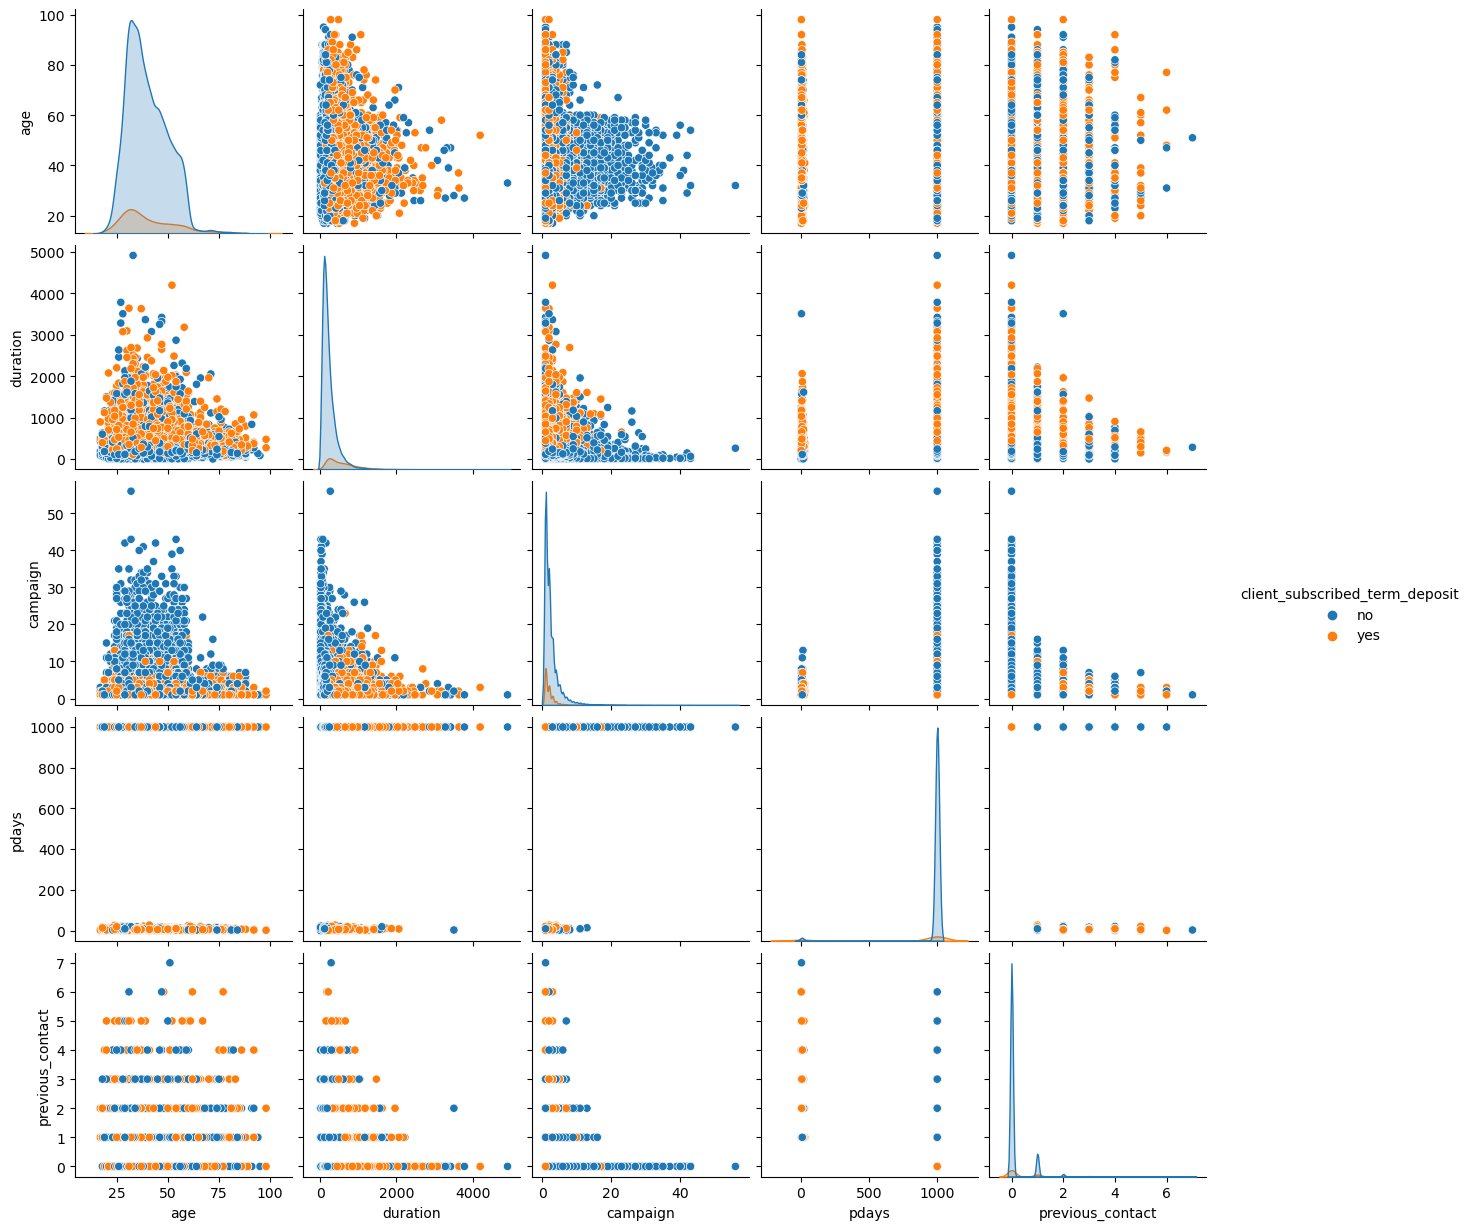

In [128]:
# List of variables to include in the pair plot
vars_to_plot = ['age',
                'duration',
                'campaign',
                'pdays',
                'previous_contact']

# Create a pairplot with selected variables
sns.pairplot(data=df, vars=vars_to_plot, hue='client_subscribed_term_deposit')
plt.show()

In [125]:
x_columns = list(df.drop(columns=['client_subscribed_term_deposit']).columns)
x_num_columns = [col for col in x_columns if df[col].dtype in ['int64', 'float64']]
x_cat_columns = [col for col in x_columns if df[col].dtype in ['object', 'category', 'string']]

In [132]:
print(x_num_columns)

['age', 'duration', 'campaign', 'pdays', 'previous_contact', 'employment_variation_rate', 'cons_price_idx', 'consumer_confidence_index', 'euribor3m', 'number_of_employees']


In [133]:
print(x_cat_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


# Classifications and K-Nearest Neighbors 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [144]:
# encode martial status and Job
le = LabelEncoder()
le.fit(["married", "single", "unknown"])
df['marital'] = le.fit_transform(df['marital'])
df.marital.value_counts()

1    24928
2    11568
0     4612
3       80
Name: marital, dtype: int64

In [145]:
# encode client_subscribed_term_deposit
le = LabelEncoder()
le.fit(["yes", "no"])
df['client_subscribed_term_deposit'] = le.fit_transform(df['client_subscribed_term_deposit'])
df.client_subscribed_term_deposit.value_counts()

0    36548
1     4640
Name: client_subscribed_term_deposit, dtype: int64

In [147]:
# encode client_subscribed_term_deposit
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df.job.value_counts()

0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64

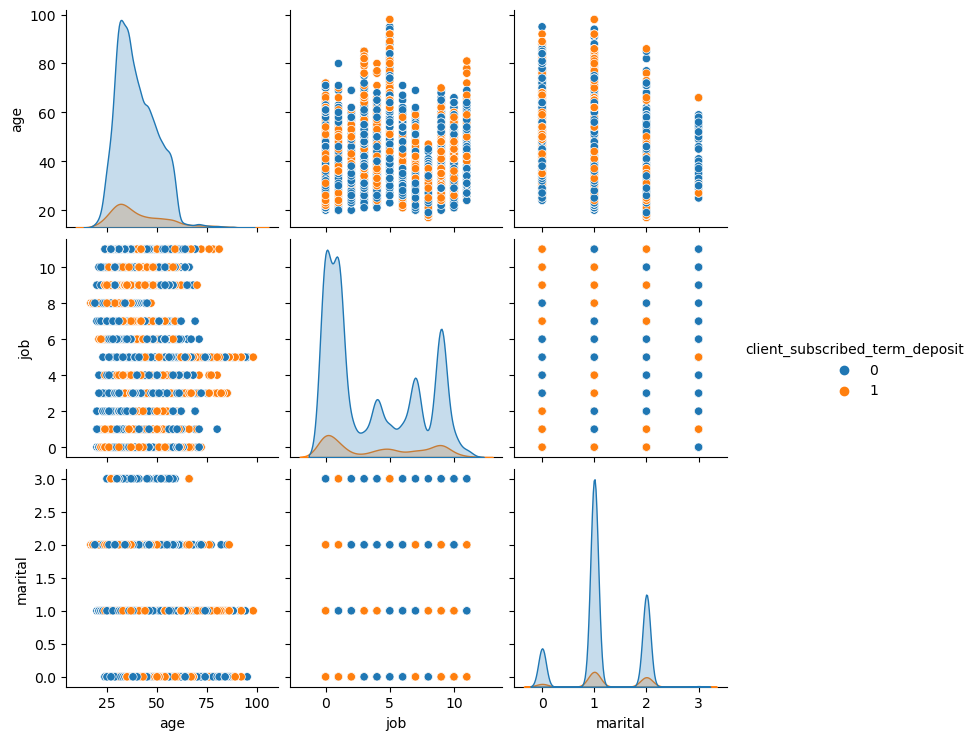

In [148]:
# List of variables to include in the pair plot
vars_to_plot = ['age',
                'job',
                'marital']

# Create a pairplot with selected variables
sns.pairplot(data=df, vars=vars_to_plot, hue='client_subscribed_term_deposit')
plt.show()

In [152]:
X = df[['age', 'job', 'marital']]
y = df['client_subscribed_term_deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Build a KNN training model with 50 neighbors using a subset of features 

In [157]:

fiftypipe = Pipeline([('knn', KNeighborsClassifier(n_neighbors=50))])
fiftypipe.fit(X_train, y_train)
fiftypipe_score = fiftypipe.score(X_test, y_test)
print(fiftypipe_score)

0.8874429445469554


In [162]:
# number of false prediction 
fiftypipe_fp = sum(pipe.predict(X_test) != y_test)
test_size = X_test.size
print(fiftypipe_fp)

1159


### Identifying the Best K

# Logistic Regression 

# Decision Tree 

# Gradient Descent and Optimisation 

# Support Vector Machines 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions